In [ ]:
!cp drive/MyDrive/НПК/train.zip train.zip
!unzip train.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/artificial/1703.png  
  inflating: train/artificial/1065.png  
  inflating: train/artificial/artificial_97.jpg  
  inflating: train/artificial/artificial_700.jpg  
  inflating: train/artificial/artificial_714.jpg  
  inflating: train/artificial/1059.png  
  inflating: train/artificial/artificial_83.jpg  
  inflating: train/artificial/artificial_68.jpg  
  inflating: train/artificial/526.png  
  inflating: train/artificial/240.png  
  inflating: train/artificial/artificial_927.jpg  
  inflating: train/artificial/artificial_1428.jpg  
  inflating: train/artificial/254.png  
  inflating: train/artificial/artificial_933.jpg  
  inflating: train/artificial/532.png  
  inflating: train/artificial/artificial_54.jpg  
  inflating: train/artificial/artificial_1366.jpg  
  inflating: train/artificial/artificial_1400.jpg  
  inflating: train/artificial/268.png  
  inflating: train/artificial/artificial_1414.jpg

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
batch_size = 8
img_height = 512
img_width = 512

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    'train',
    validation_split=0.25,
    seed=123,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    'train',
    validation_split=0.25,
    seed=123,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

print(train_ds.class_names)
print(val_ds.class_names)

Found 7236 files belonging to 2 classes.
Using 5427 files for training.
Found 7236 files belonging to 2 classes.
Using 1809 files for validation.
['artificial', 'human']
['artificial', 'human']


In [ ]:
model_input = keras.Input(shape=(None, None, 3), name='img')
x = layers.Resizing(512, 512, input_shape=(512, 512, 3), name='resize')(model_input)
x = layers.Rescaling(1./255, input_shape=(512, 512, 3), name='rescaling')(x)
x = layers.GaussianNoise(0.01, input_shape=(512, 512, 3), name='noise')(x)
x = layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(512, 512, 3), kernel_regularizer=tf.keras.regularizers.l2(0.0001), name='conv1')(x)
x = layers.MaxPooling2D(name='max_pool1')(x)
x = layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), name='conv2')(x)
x = layers.MaxPooling2D(name='max_pool2')(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0001), name='conv3')(x)
x = layers.MaxPooling2D(name='max_pool3')(x)
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(128, activation='relu', name='dense1', kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
x = layers.Dropout(0.2, name='dropout')(x)
model_output = layers.Dense(2, name='dense2')(x)

model = keras.Model(model_input, model_output, name='ai_image_classification')

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.001,
    decay_steps=65,
    decay_rate=0.96,
    staircase=True)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  steps_per_epoch=65,
  epochs=epochs
)

Epoch 1/10
65/65 [==============================] - 427s 7s/step - loss: 1.2853 - accuracy: 0.5750 - val_loss: 0.7038 - val_accuracy: 0.6683
Epoch 2/10
65/65 [==============================] - 421s 7s/step - loss: 0.7018 - accuracy: 0.6442 - val_loss: 0.6322 - val_accuracy: 0.6871
Epoch 3/10
65/65 [==============================] - 428s 7s/step - loss: 0.6948 - accuracy: 0.6423 - val_loss: 0.6924 - val_accuracy: 0.6915
Epoch 4/10
65/65 [==============================] - 480s 7s/step - loss: 0.6741 - accuracy: 0.6635 - val_loss: 0.6825 - val_accuracy: 0.6009
Epoch 5/10
65/65 [==============================] - 416s 6s/step - loss: 0.6716 - accuracy: 0.6596 - val_loss: 0.6215 - val_accuracy: 0.7098
Epoch 6/10
65/65 [==============================] - 406s 6s/step - loss: 0.6375 - accuracy: 0.7000 - val_loss: 0.6345 - val_accuracy: 0.6479
Epoch 7/10
65/65 [==============================] - 415s 6s/step - loss: 0.6381 - accuracy: 0.7058 - val_loss: 0.6039 - val_accuracy: 0.7043
Epoch 8/10
65

In [ ]:
for i in range(epochs):
  print(history.history['accuracy'][i], history.history['val_accuracy'][i], history.history['loss'][i], history.history['val_loss'][i])

0.7147125005722046 0.7600896954536438 0.7320335507392883 0.5534262657165527
0.7826736569404602 0.7698056697845459 0.5559463500976562 0.5851869583129883
0.8533731698989868 0.7727952003479004 0.4828992784023285 0.6997541189193726
0.89818274974823 0.7638266086578369 0.43497851490974426 0.8433592319488525
0.9305452108383179 0.7443946003913879 0.37578874826431274 0.8211175203323364
0.9596713781356812 0.7750373482704163 0.3277362287044525 1.4635416269302368
0.9676375389099121 0.76756352186203 0.2944454252719879 1.6674784421920776
0.9738610982894897 0.7496262788772583 0.2788083255290985 1.167466640472412
0.9701269865036011 0.7638266086578369 0.31092923879623413 1.241693377494812
0.9803335666656494 0.7623318433761597 0.2614750564098358 1.6568760871887207


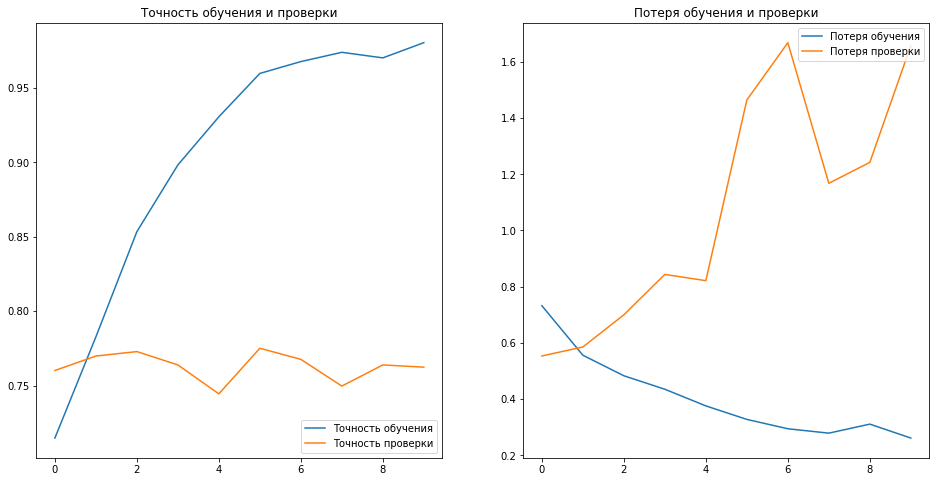

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность обучения')
plt.plot(epochs_range, val_acc, label='Точность проверки')
plt.legend(loc='lower right')
plt.title('Точность обучения и проверки')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потеря обучения')
plt.plot(epochs_range, val_loss, label='Потеря проверки')
plt.legend(loc='upper right')
plt.title('Потеря обучения и проверки')
plt.show()

In [ ]:
model.save_weights("epoch10_preview.ckpt")
model.save("npk.h5")
!cp npk.h5 drive/MyDrive/НПК/preview_npk.h5
!cp epoch10_preview.ckpt* drive/MyDrive/НПК/

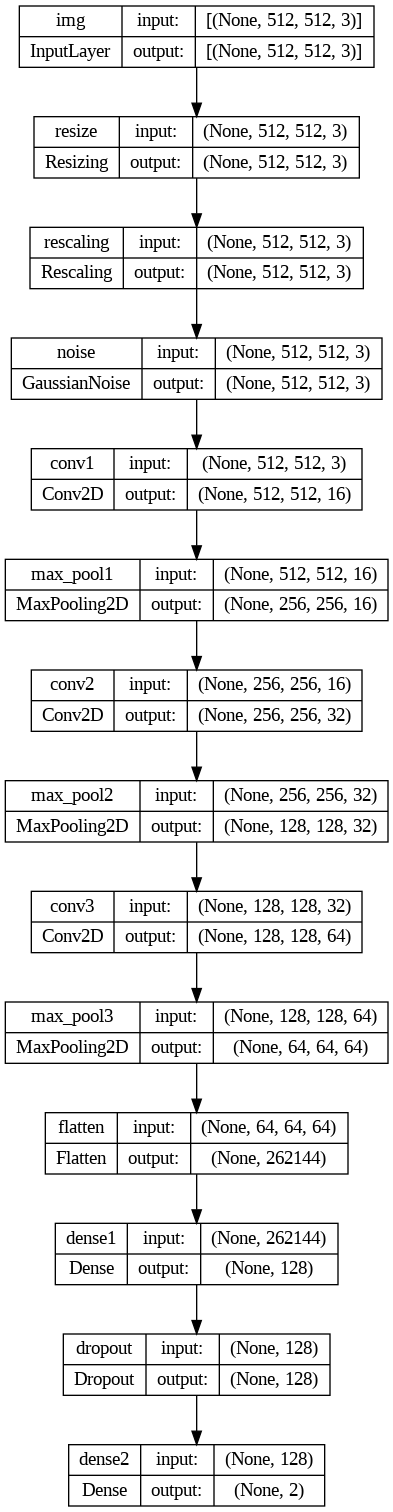

In [ ]:
from PIL import Image
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True, rankdir='TB')
Image.open('model.png')

In [ ]:
!curl 'https://picturesqueai.photos/api/pictures?page=0&size=240' > images.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 95929  100 95929    0     0   131k      0 --:--:-- --:--:-- --:--:--  131k


In [ ]:
!cp drive/MyDrive/НПК/preview_npk.h5 npk.h5

In [ ]:
model = tf.keras.models.load_model('npk.h5')

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
import json
import base64
import requests
import io
import numpy
from PIL import Image

f = open('images.json')
images = json.load(f)
f.close()

results = []

full_batch = []

for image in images:
  print(f'Downloaded {image["id"]}')
  img_data = requests.get(image["file"]).content
  img = Image.open(io.BytesIO(img_data))
  img = tf.keras.utils.img_to_array(img)
  full_batch.append(img)

full_batch = tf.data.Dataset.from_tensors(full_batch)
predictions = probability_model.predict(full_batch)
print(predictions)
for prediction in predictions:
  results.append([numpy.asscalar(prediction[1]), numpy.asscalar(prediction[0])])

f = open('results_group4.json', 'w', encoding='utf-8')
json.dump(results, f, ensure_ascii=False, indent=2)
f.close()

Downloaded 258
Downloaded 257
Downloaded 256
Downloaded 255
Downloaded 254
Downloaded 253
Downloaded 252
Downloaded 251
Downloaded 250
Downloaded 249
Downloaded 248
Downloaded 247
Downloaded 246
Downloaded 245
Downloaded 244
Downloaded 243
Downloaded 242
Downloaded 241
Downloaded 240
Downloaded 239
Downloaded 238
Downloaded 237
Downloaded 236
Downloaded 235
Downloaded 234
Downloaded 233
Downloaded 232
Downloaded 231
Downloaded 230
Downloaded 229
Downloaded 228
Downloaded 227
Downloaded 226
Downloaded 225
Downloaded 224
Downloaded 223
Downloaded 222
Downloaded 221
Downloaded 220
Downloaded 219
Downloaded 218
Downloaded 217
Downloaded 216
Downloaded 215
Downloaded 214
Downloaded 213
Downloaded 212
Downloaded 211
Downloaded 210
Downloaded 209
Downloaded 208
Downloaded 207
Downloaded 206
Downloaded 205
Downloaded 204
Downloaded 203
Downloaded 202
Downloaded 201
Downloaded 200
Downloaded 199
Downloaded 198
Downloaded 197
Downloaded 196
Downloaded 195
Downloaded 194
Downloaded 193
Downloaded

<ipython-input-21-f25fbeb1de5b>:27: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  results.append([numpy.asscalar(prediction[1]), numpy.asscalar(prediction[0])])


In [ ]:
correct = 0

for res in results:
  if res[0] > 0.5:
    correct = correct + 1

print(correct, correct/len(results))

205 0.8686440677966102


In [ ]:
!unzip 2.zip

Archive:  2.zip
   creating: 2/25percent/
  inflating: 2/25percent/.DS_Store   
  inflating: 2/25percent/8.png       
  inflating: 2/25percent/9.png       
  inflating: 2/25percent/10.png      
  inflating: 2/25percent/4.png       
  inflating: 2/25percent/5.png       
  inflating: 2/25percent/7.png       
  inflating: 2/25percent/6.png       
  inflating: 2/25percent/2.png       
  inflating: 2/25percent/3.png       
  inflating: 2/25percent/1.png       
   creating: 2/40percent/
  inflating: 2/40percent/8.png       
  inflating: 2/40percent/9.png       
  inflating: 2/40percent/10.png      
  inflating: 2/40percent/4.png       
  inflating: 2/40percent/5.png       
  inflating: 2/40percent/7.png       
  inflating: 2/40percent/6.png       
  inflating: 2/40percent/2.png       
  inflating: 2/40percent/3.png       
  inflating: 2/40percent/1.png       
   creating: 2/50percent/
  inflating: 2/50percent/8.png       
  inflating: 2/50percent/9.png       
  inflating: 2/50percent/10.png 

In [ ]:
import glob
import json
import base64
import requests
import io
import numpy
from PIL import Image

results = []

full_batch = []

files = glob.glob("2/25percent/*.png")

files = [files[i:i + 60] for i in range(0, len(files), 60)]

for files in files:
  full_batch = []

  for image in files:
    img = Image.open(image)
    img = tf.keras.utils.img_to_array(img)
    if img.shape[-1] != 3:
      continue
    full_batch.append(img)
    print(f'Loaded {image}')

  full_batch = tf.data.Dataset.from_tensors(full_batch)
  predictions = probability_model.predict(full_batch)
  print(predictions)
  for prediction in predictions:
    results.append([numpy.asscalar(prediction[0]), numpy.asscalar(prediction[1])])

f = open('results_group2.json', 'w', encoding='utf-8')
json.dump(results, f, ensure_ascii=False, indent=2)
f.close()

correct = 0

for res in results:
  if res[0] > 0.5:
    correct = correct + 1

print(correct, correct/len(results))

Loaded 2/25percent/1.png
Loaded 2/25percent/7.png
Loaded 2/25percent/9.png
Loaded 2/25percent/6.png
Loaded 2/25percent/8.png
Loaded 2/25percent/3.png
Loaded 2/25percent/2.png
Loaded 2/25percent/10.png
Loaded 2/25percent/4.png
Loaded 2/25percent/5.png
1/1 [==============================] - 1s 723ms/step
[[0.11295593 0.8870441 ]
 [0.22745559 0.7725443 ]
 [0.04923918 0.9507607 ]
 [0.18573995 0.81426007]
 [0.2606736  0.73932636]
 [0.00637734 0.99362266]
 [0.3038584  0.69614154]
 [0.21945618 0.78054386]
 [0.2620191  0.7379809 ]
 [0.32507503 0.67492497]]
0 0.0


<ipython-input-39-dbbce8eeaa19>:32: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  results.append([numpy.asscalar(prediction[0]), numpy.asscalar(prediction[1])])


In [ ]:
import glob
import json
import base64
import requests
import io
import numpy
from PIL import Image

results = []

full_batch = []

files = glob.glob("train/human/*.jpg")

files = [files[i:i + 60] for i in range(0, len(files), 60)]

for files in files:
  full_batch = []

  for image in files:
    img = Image.open(image)
    img = tf.keras.utils.img_to_array(img)
    if img.shape[-1] != 3:
      continue
    full_batch.append(img)
    print(f'Loaded {image}')

  full_batch = tf.data.Dataset.from_tensors(full_batch)
  predictions = probability_model.predict(full_batch)
  print(predictions)
  for prediction in predictions:
    results.append([numpy.asscalar(prediction[0]), numpy.asscalar(prediction[1])])

f = open('results_group5.json', 'w', encoding='utf-8')
json.dump(results, f, ensure_ascii=False, indent=2)
f.close()

correct = 0

for res in results:
  if res[1] > 0.5:
    correct = correct + 1

print(correct, correct/len(results))

Loaded train/human/drawing_329.jpg
Loaded train/human/Art_680.jpg
Loaded train/human/painting_659.jpg
Loaded train/human/Art_524.jpg
Loaded train/human/painting_199.jpg
Loaded train/human/drawing_183.jpg
Loaded train/human/Art_693.jpg
Loaded train/human/drawing_942.jpg
Loaded train/human/drawing_656.jpg
Loaded train/human/photographs_172.jpg
Loaded train/human/painting_39.jpg
Loaded train/human/Art_627.jpg
Loaded train/human/Art_467.jpg
Loaded train/human/painting_583.jpg
Loaded train/human/photographs_65.jpg
Loaded train/human/Art_85.jpg
Loaded train/human/drawing_420.jpg
Loaded train/human/Art_2.jpg
Loaded train/human/painting_140.jpg
Loaded train/human/drawing_728.jpg
Loaded train/human/drawing_202.jpg
Loaded train/human/drawing_678.jpg
Loaded train/human/drawing_439.jpg
Loaded train/human/painting_189.jpg
Loaded train/human/painting_779.jpg
Loaded train/human/Art_358.jpg
Loaded train/human/drawing_117.jpg
Loaded train/human/drawing_970.jpg
Loaded train/human/painting_495.jpg
Loaded

<ipython-input-29-4a4dc22f1d96>:32: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  results.append([numpy.asscalar(prediction[0]), numpy.asscalar(prediction[1])])


Loaded train/human/painting_773.jpg
Loaded train/human/drawing_850.jpg
Loaded train/human/Art_122.jpg
Loaded train/human/Art_346.jpg
Loaded train/human/painting_720.jpg
Loaded train/human/Art_850.jpg
Loaded train/human/painting_47.jpg
Loaded train/human/drawing_661.jpg
Loaded train/human/Art_410.jpg
Loaded train/human/drawing_999.jpg
Loaded train/human/drawing_644.jpg
Loaded train/human/painting_343.jpg
Loaded train/human/Art_93.jpg
Loaded train/human/Art_552.jpg
Loaded train/human/painting_593.jpg
Loaded train/human/painting_11.jpg
Loaded train/human/Art_110.jpg
Loaded train/human/drawing_707.jpg
Loaded train/human/painting_132.jpg
Loaded train/human/photographs_149.jpg
Loaded train/human/drawing_543.jpg
Loaded train/human/painting_36.jpg
Loaded train/human/drawing_1028.jpg
Loaded train/human/painting_574.jpg
Loaded train/human/drawing_840.jpg
Loaded train/human/painting_403.jpg
Loaded train/human/painting_73.jpg
Loaded train/human/Art_284.jpg
Loaded train/human/painting_126.jpg
Loade

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


Выходные данные были обрезаны до нескольких последних строк (5000).
Loaded train/human/painting_114.jpg
Loaded train/human/Art_555.jpg
Loaded train/human/painting_524.jpg
Loaded train/human/Art_817.jpg
Loaded train/human/painting_473.jpg
Loaded train/human/painting_58.jpg
Loaded train/human/Art_742.jpg
Loaded train/human/drawing_76.jpg
Loaded train/human/Art_32.jpg
Loaded train/human/painting_744.jpg
Loaded train/human/painting_843.jpg
Loaded train/human/drawing_479.jpg
Loaded train/human/painting_255.jpg
Loaded train/human/drawing_381.jpg
Loaded train/human/photographs_260.jpg
Loaded train/human/Art_752.jpg
Loaded train/human/painting_56.jpg
Loaded train/human/drawing_435.jpg
Loaded train/human/photographs_142.jpg
Loaded train/human/photographs_348.jpg
Loaded train/human/Art_793.jpg
Loaded train/human/painting_139.jpg
Loaded train/human/drawing_1040.jpg
Loaded train/human/Art_423.jpg
Loaded train/human/painting_724.jpg
Loaded train/human/Art_508.jpg
Loaded train/human/painting_397.jpg

In [ ]:
import glob
import json
import base64
import requests
import io
import numpy
from PIL import Image

results = []

full_batch = []

files = glob.glob("train/artificial/*.jpg")

files = [files[i:i + 60] for i in range(0, len(files), 60)]

for files in files:
  full_batch = []

  for image in files:
    img = Image.open(image)
    img = tf.keras.utils.img_to_array(img)
    if img.shape[-1] != 3:
      continue
    full_batch.append(img)
    print(f'Loaded {image}')

  full_batch = tf.data.Dataset.from_tensors(full_batch)
  predictions = probability_model.predict(full_batch)
  print(predictions)
  for prediction in predictions:
    results.append([numpy.asscalar(prediction[0]), numpy.asscalar(prediction[1])])

f = open('results_group5artificial.json', 'w', encoding='utf-8')
json.dump(results, f, ensure_ascii=False, indent=2)
f.close()

correct = 0

for res in results:
  if res[0] > 0.5:
    correct = correct + 1

print(correct, correct/len(results))

Loaded train/artificial/artificial_458.jpg
Loaded train/artificial/artificial_262.jpg
Loaded train/artificial/artificial_110.jpg
Loaded train/artificial/artificial_1720.jpg
Loaded train/artificial/artificial_1045.jpg
Loaded train/artificial/artificial_629.jpg
Loaded train/artificial/artificial_1212.jpg
Loaded train/artificial/artificial_608.jpg
Loaded train/artificial/artificial_853.jpg
Loaded train/artificial/artificial_882.jpg
Loaded train/artificial/artificial_1626.jpg
Loaded train/artificial/artificial_120.jpg
Loaded train/artificial/artificial_316.jpg
Loaded train/artificial/artificial_311.jpg
Loaded train/artificial/artificial_1011.jpg
Loaded train/artificial/artificial_247.jpg
Loaded train/artificial/artificial_307.jpg
Loaded train/artificial/artificial_68.jpg
Loaded train/artificial/artificial_220.jpg
Loaded train/artificial/artificial_1047.jpg
Loaded train/artificial/artificial_638.jpg
Loaded train/artificial/artificial_452.jpg
Loaded train/artificial/artificial_1492.jpg
Loade

<ipython-input-30-a236d326f58b>:32: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  results.append([numpy.asscalar(prediction[0]), numpy.asscalar(prediction[1])])


Loaded train/artificial/artificial_315.jpg
Loaded train/artificial/artificial_49.jpg
Loaded train/artificial/artificial_1465.jpg
Loaded train/artificial/artificial_1652.jpg
Loaded train/artificial/artificial_705.jpg
Loaded train/artificial/artificial_598.jpg
Loaded train/artificial/artificial_235.jpg
Loaded train/artificial/artificial_687.jpg
Loaded train/artificial/artificial_1491.jpg
Loaded train/artificial/artificial_791.jpg
Loaded train/artificial/artificial_1044.jpg
Loaded train/artificial/artificial_1320.jpg
Loaded train/artificial/artificial_1072.jpg
Loaded train/artificial/artificial_1016.jpg
Loaded train/artificial/artificial_330.jpg
Loaded train/artificial/artificial_1265.jpg
Loaded train/artificial/artificial_401.jpg
Loaded train/artificial/artificial_1538.jpg
Loaded train/artificial/artificial_1347.jpg
Loaded train/artificial/artificial_1217.jpg
Loaded train/artificial/artificial_1543.jpg
Loaded train/artificial/artificial_994.jpg
Loaded train/artificial/artificial_683.jpg
